# **Final Tutorial**
# **The Analysis of How Different Factors Impact Anxiety Level** <br>
## Yuanhan Yu

github io link: https://github.com/AlvinYuyyh0208/AlvinYuyyh0208.github.io

final tutorial html link: https://alvinyuyyh0208.github.io/final_tutorial_Yu.html

data source:
https://storage.googleapis.com/kagglesdsdata/datasets/6508490/10514864/anxiety <br>
This is the original data source link, but unfortunately somehow this dataset got removed

This ***anxiety_attack_dataset*** measures age, gender, occupation, lifestyles like sleep hour, caffeine intake, alcohol intake, smoking condition, it also measures health indicators like heart rate, breathing rate, sweating, dizziness. The most important thing is that it measures anxiety attack severity scaling from 1 to 10, which would be a very significant result. It also includes other indicators and factors such as dizziness, medication, diet quality.

## **Project Goal**: <br>
I would love to use this dataset to investigate how anxiety attack severity effects among different gender and age.
And it would also be interesting to figure out how different lifestyles influence health indicators, for example how caffeine intake effects heart rate.
I'll also analyze how different factors effect the severity of anxiety attack <br>
*Hypothesis:* <br>
People who are in middle age tend to have higher level of anxiety <br>
More caffeine and alchohol intake might cause higher heart rate <br>
Less sleep hour or less physical activity might cause higher severity of anxiety attack<br>
More caffeine and alcohol intake might cause higher anxiety level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


%cd /content
!git clone https://github.com/AlvinYuyyh0208/AlvinYuyyh0208.github.io
%cd /content/AlvinYuyyh0208.github.io

/content
Cloning into 'AlvinYuyyh0208.github.io'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 34 (delta 13), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 625.79 KiB | 1.35 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/AlvinYuyyh0208.github.io


In [2]:
anxiety=pd.read_csv('anxiety_attack_dataset.csv')
anxiety.head(5)

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [3]:
anxiety.dtypes

,0
ID,int64
Age,int64
Gender,object
Occupation,object
Sleep Hours,float64
Physical Activity (hrs/week),float64
Caffeine Intake (mg/day),int64
Alcohol Consumption (drinks/week),int64
Smoking,object
Family History of Anxiety,object


## **Cleaning Data**

Here some variables are potentially not gonna be used: "Sweating Level (1-5)", "Dizziness", "Medication", "Recent Major Life Event", "Therapy Sessions (per month)"

In [4]:
columns_to_be_removed = ['Sweating Level (1-5)', 'Dizziness', 'Medication', 'Recent Major Life Event']
anxiety = anxiety.drop(columns_to_be_removed, axis = 1)

In [5]:
anxiety.head(5)

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,4,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,0,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,7,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,4,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,0,1,1


## **Analysis of how severity of anxiety attack is different among different gender and age**

In [6]:
anxiety.groupby('Gender')['Severity of Anxiety Attack (1-10)'].mean()

,Severity of Anxiety Attack (1-10)
Gender,
Female,5.476158
Male,5.532238
Other,5.596154


The severity of anxiety attck between different gender isn't very obvious. 'Other' gender has slightly higher severity but it seems people have a fair level of anxiety

In [7]:
age_mean=anxiety.groupby('Age')['Severity of Anxiety Attack (1-10)'].mean()
age_mean_min=age_mean.min()
age_mean_max=age_mean.max()
age_mean_idmin=age_mean.idxmin()
age_mean_idmax=age_mean.idxmax()
print("the minimun average number of anxiety severity:",age_mean_min,"the maximun average number of anxiety severity:", age_mean_max)
print("the minimun average number of age:",age_mean_idmin,"the maximun average number of age:", age_mean_idmax)


the minimun average number of anxiety severity: 5.082251082251083 the maximun average number of anxiety severity: 5.882845188284519
the minimun average number of age: 48 the maximun average number of age: 22


This result is totally different from what I thought. It shows the maximun average number of anxiety severity is around 0.8 higher than the minimun one, and young people who are around college age seem to have more severe anxiety problem, however, people around middle age 48 seems to have less problem with anxiety. <br>


## **Set Age Groups**

Each age probably represents each age group, so next I want to seperate these ages to different groups and I set the range as 3, such as 18-20, 21-22...

In [8]:
bins = [18, 20,23,26,29,32,35,38,41,44,47,50,53,56,59,62, 64]
label = ['18-20', '21-23', '24-26', '27-29', '30-32', '33-35', '36-38', '39-41', '42-44','45-47','48-50','51-53','54-56','57-59','60-62','63-64']

anxiety['age_group'] = pd.cut(anxiety['Age'], bins=bins, labels=label, right=True)

anxiety_age_group_mean = anxiety.groupby('age_group')[['Sleep Hours', 'Physical Activity (hrs/week)',
                                      'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
                                      'Stress Level (1-10)', 'Diet Quality (1-10)','Severity of Anxiety Attack (1-10)',
                                      'Heart Rate (bpm during attack)',	'Breathing Rate (breaths/min)','Therapy Sessions (per month)']].mean()



<ipython-input-8-d40d724f0269>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anxiety_age_group_mean = anxiety.groupby('age_group')[['Sleep Hours', 'Physical Activity (hrs/week)',


In [9]:
anxiety_age_group_mean[['Severity of Anxiety Attack (1-10)']].sort_values(by="Severity of Anxiety Attack (1-10)", ascending=False)

,Severity of Anxiety Attack (1-10)
age_group,
45-47,5.692405
21-23,5.651132
51-53,5.575758
42-44,5.575290
33-35,5.563415
30-32,5.561608
18-20,5.560078
54-56,5.553080
24-26,5.547067


According to this result, actually people from 45-47 years old have the highest anxiety level, people from 21-23 have the second highest anxiety level. <br>
So next I need to do investigation how personal lifestyle affects anxiety level

## **How personal lifestyle affects severity of anxiety attck (among different age)**

In [10]:
# Sleep Hours	Physical Activity (hrs/week)	Caffeine Intake (mg/day)	Alcohol Consumption (drinks/week)

lifestyle_age=anxiety.groupby('Age')[['Sleep Hours', 'Physical Activity (hrs/week)',
                                      'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
                                      'Stress Level (1-10)', 'Diet Quality (1-10)','Therapy Sessions (per month)']].mean()
lifestyle_age


,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Diet Quality (1-10),Therapy Sessions (per month)
Age,,,,,,,
18,6.454065,5.032114,240.260163,9.434959,5.337398,5.138211,4.451220
19,6.688258,4.878409,271.450758,10.045455,5.340909,5.818182,4.537879
20,6.698810,5.080159,243.539683,9.817460,5.388889,5.285714,4.361111
21,6.612595,5.229771,251.828244,9.469466,5.125954,5.099237,4.400763
22,6.209205,5.309205,238.899582,9.472803,5.619247,5.343096,4.384937
23,6.670400,5.268000,258.044000,9.048000,5.864000,5.752000,4.432000
24,6.382379,4.888546,225.792952,9.559471,5.418502,5.422907,4.365639
25,6.136078,5.049804,256.078431,9.658824,5.631373,5.764706,4.321569
26,6.343028,4.887649,244.701195,9.382470,5.294821,5.362550,4.808765


In [11]:
lifestyle_age.loc[22]

,22
Sleep Hours,6.209205
Physical Activity (hrs/week),5.309205
Caffeine Intake (mg/day),238.899582
Alcohol Consumption (drinks/week),9.472803
Stress Level (1-10),5.619247
Diet Quality (1-10),5.343096
Therapy Sessions (per month),4.384937


In [12]:
lifestyle_age.loc[48]

,48
Sleep Hours,6.548052
Physical Activity (hrs/week),5.129437
Caffeine Intake (mg/day),256.510823
Alcohol Consumption (drinks/week),10.151515
Stress Level (1-10),5.316017
Diet Quality (1-10),5.826840
Therapy Sessions (per month),4.493506


According to the results, 22-year-old group has less sleep hour, but more physical activity hour per week. 48-year-old group has more caffeine and alcohol intake, especially caffeine intake is apparently higher than the another group. The stress level is higher in 22-year-old group  and they also have lower diet quality.

In [13]:
anxiety_age_group_mean

,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Diet Quality (1-10),Severity of Anxiety Attack (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Therapy Sessions (per month)
age_group,,,,,,,,,,
18-20,6.693411,4.976938,257.819767,9.934109,5.364341,5.558140,5.560078,122.562016,24.753876,4.451550
21-23,6.503462,5.267776,249.782956,9.330226,5.528628,5.394141,5.651132,118.139814,25.716378,4.406125
24-26,6.283220,4.944338,242.803547,9.533424,5.450205,5.521146,5.547067,120.774898,25.605730,4.502046
27-29,6.466053,5.147105,251.072368,9.226316,5.476316,5.492105,5.494737,118.263158,25.130263,4.659211
30-32,6.461349,4.988457,254.679637,9.236057,5.343709,5.390402,5.561608,121.225681,25.661479,4.396887
33-35,6.601707,4.880122,236.960976,9.780488,5.360976,5.592683,5.563415,119.341463,25.015854,4.500000
36-38,6.401704,4.919921,236.636959,9.449541,5.276540,5.484928,5.471822,121.446920,25.385321,4.630406
39-41,6.348496,5.044612,249.528822,9.538847,5.541353,5.578947,5.344612,119.723058,25.721805,4.657895
42-44,6.518275,4.996268,249.931789,9.616474,5.549550,5.518662,5.575290,118.491634,25.764479,4.369369


In [14]:
anxiety_age_group_mean.loc['21-23']

,21-23
Sleep Hours,6.503462
Physical Activity (hrs/week),5.267776
Caffeine Intake (mg/day),249.782956
Alcohol Consumption (drinks/week),9.330226
Stress Level (1-10),5.528628
Diet Quality (1-10),5.394141
Severity of Anxiety Attack (1-10),5.651132
Heart Rate (bpm during attack),118.139814
Breathing Rate (breaths/min),25.716378
Therapy Sessions (per month),4.406125


In [15]:
anxiety_age_group_mean.loc['45-47']

,45-47
Sleep Hours,6.475696
Physical Activity (hrs/week),5.043671
Caffeine Intake (mg/day),241.300000
Alcohol Consumption (drinks/week),9.477215
Stress Level (1-10),5.493671
Diet Quality (1-10),5.605063
Severity of Anxiety Attack (1-10),5.692405
Heart Rate (bpm during attack),120.656962
Breathing Rate (breaths/min),25.502532
Therapy Sessions (per month),4.526582


<ipython-input-16-a712fef9a003>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anxiety_level=anxiety.groupby('age_group')['Severity of Anxiety Attack (1-10)'].mean()
<ipython-input-16-a712fef9a003>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  factor=anxiety.groupby('age_group')['Caffeine Intake (mg/day)'].mean()


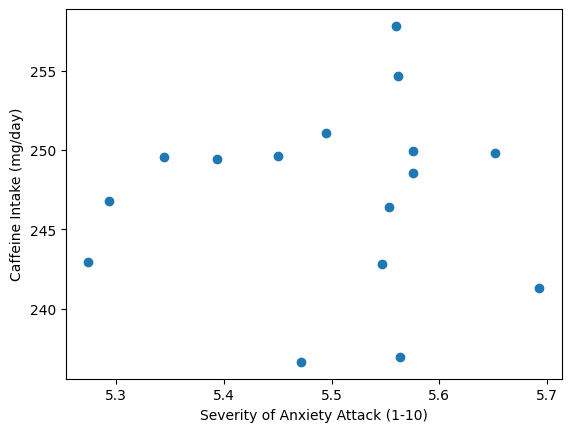

In [16]:
anxiety_level=anxiety.groupby('age_group')['Severity of Anxiety Attack (1-10)'].mean()
anxiety_level
factor=anxiety.groupby('age_group')['Caffeine Intake (mg/day)'].mean()
factor
plt.scatter(anxiety_level.values,factor.values)

plt.xlabel('Severity of Anxiety Attack (1-10)')
plt.ylabel('Caffeine Intake (mg/day)')

plt.show()

In [17]:
anxiety_level.corr(factor)

np.float64(0.03542925514640818)

<ipython-input-18-18cdc7064474>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anxiety_level=anxiety.groupby('age_group')['Severity of Anxiety Attack (1-10)'].mean()
<ipython-input-18-18cdc7064474>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  factor=anxiety.groupby('age_group')['Alcohol Consumption (drinks/week)'].mean()


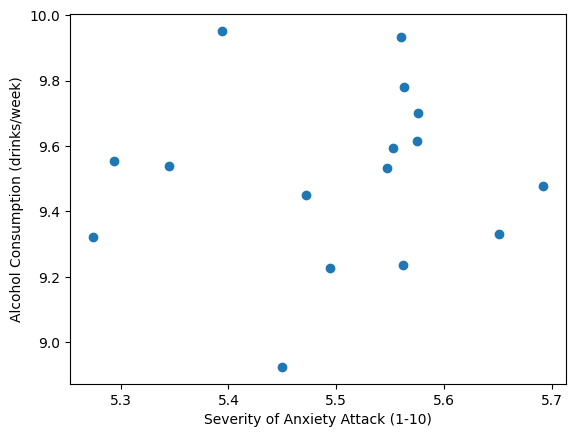

In [18]:
anxiety_level=anxiety.groupby('age_group')['Severity of Anxiety Attack (1-10)'].mean()
anxiety_level
factor=anxiety.groupby('age_group')['Alcohol Consumption (drinks/week)'].mean()
factor
plt.scatter(anxiety_level.values,factor.values)

plt.xlabel('Severity of Anxiety Attack (1-10)')
plt.ylabel('Alcohol Consumption (drinks/week)')
plt.show()

In [19]:
anxiety_level.corr(factor)

np.float64(0.07215943479158583)

### **!!** One funny observation is that there is a nagtive coorelation between stress level and anxiety severity

People who have less stress level tend to have higher anxiety severity, but the correlation is very weak

<ipython-input-20-24752a34bd4c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anxiety_level=anxiety.groupby('age_group')['Severity of Anxiety Attack (1-10)'].mean()
<ipython-input-20-24752a34bd4c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  factor=anxiety.groupby('age_group')['Stress Level (1-10)'].mean()


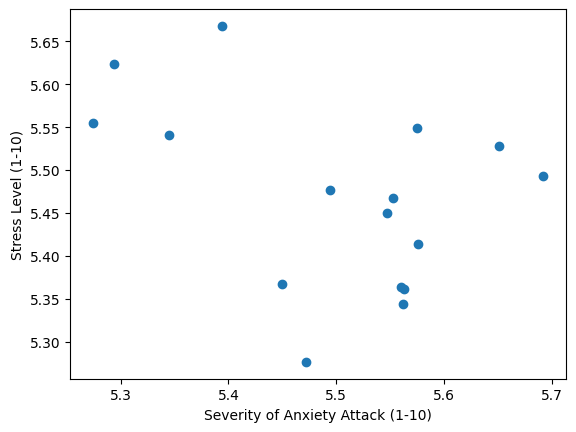

In [20]:
anxiety_level=anxiety.groupby('age_group')['Severity of Anxiety Attack (1-10)'].mean()
anxiety_level
factor=anxiety.groupby('age_group')['Stress Level (1-10)'].mean()
factor
plt.scatter(anxiety_level.values,factor.values)

plt.xlabel('Severity of Anxiety Attack (1-10)')
plt.ylabel('Stress Level (1-10)')
plt.show()

In [21]:
anxiety_level.corr(factor)

np.float64(-0.4030700405529938)

compare the average number of therapy session among each age group

In [22]:
# therapy session
anxiety_age_group_mean.groupby('age_group')['Therapy Sessions (per month)'].mean().sort_values(ascending=True)

<ipython-input-22-a2505edc35a2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anxiety_age_group_mean.groupby('age_group')['Therapy Sessions (per month)'].mean().sort_values(ascending=True)


,Therapy Sessions (per month)
age_group,
63-64,4.368000
42-44,4.369369
30-32,4.396887
21-23,4.406125
18-20,4.451550
51-53,4.459816
48-50,4.494071
33-35,4.500000
24-26,4.502046


In [23]:
anxiety_age_group_mean['Therapy Sessions (per month)'].corr(anxiety_age_group_mean['Severity of Anxiety Attack (1-10)'])

np.float64(-0.36624403595221416)

From this result we can see that people who have severe anxiety problem are not very positive to have therapy session. And there is nagtive correlation between it and anxiety level, so that can probably be one of the reason that causes anxiety

So now the result is different from the hypothesis that higher caffeine and alcohol intake cause more severe anxiety. The correlation is very weak. But we can see the anxiety level might be related to stress level, sleep hour or diet quality. But none of them is strong correlated<br>


Next I want to investigate how different lifestyle effects body indicators like heart rate and breathing rate

## **How Lifestyle Effects Body Indicators**

This section shows how the combination of caffeine and alcohol affect heart rate

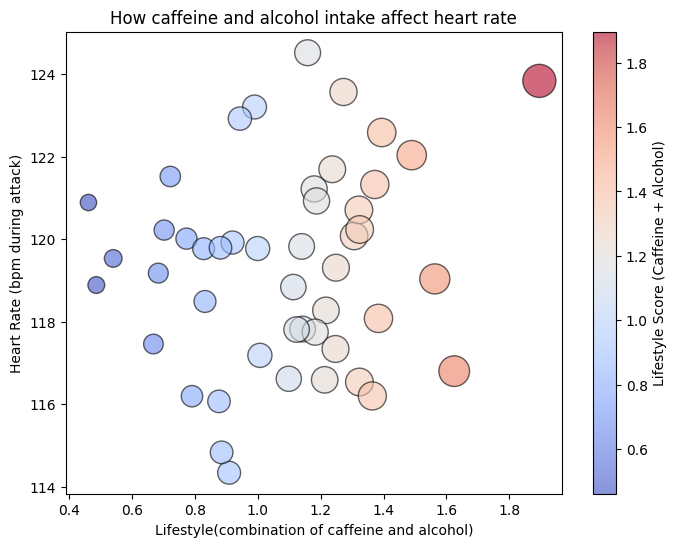

In [24]:
caffeine = anxiety.groupby('Age')['Caffeine Intake (mg/day)'].mean()
alcohol = anxiety.groupby('Age')['Alcohol Consumption (drinks/week)'].mean()
heart_rate = anxiety.groupby('Age')['Heart Rate (bpm during attack)'].mean()

caffeine_scaled = (caffeine - caffeine.min()) / (caffeine.max() - caffeine.min())
alcohol_scaled = (alcohol - alcohol.min()) / (alcohol.max() - alcohol.min())

lifestyle = caffeine_scaled + alcohol_scaled

sizes = lifestyle * 300

plt.figure(figsize=(8, 6))
plt.scatter(lifestyle, heart_rate, s=sizes, alpha=0.6, c=lifestyle, cmap="coolwarm", edgecolors="k")

plt.xlabel('Lifestyle(combination of caffeine and alcohol)')
plt.ylabel('Heart Rate (bpm during attack)')
plt.title('How caffeine and alcohol intake affect heart rate')

cbar = plt.colorbar()
cbar.set_label("Lifestyle Score (Caffeine + Alcohol)")

plt.show()


In [25]:
lifestyle.corr(heart_rate)

np.float64(0.16446203542007867)

According to the result, there is weak positive correlation between lifestyle and heart rate, more caffeine and alcohol intake might cause higher heart rate as what I thought in my hypothesis

## Conclusion of Milestone 1 <br>
All these correlations I found are very weak and maybe not persuasive. People from 45-47, and 22 have the highest severity of anxiety, and the change of anxiety level isn't constant as the age increasing. Maybe people in those age period are experiencing something special. My hypothesis is people from 45-47 might be facing debt issue, family issue, divorce problem, or kids' education problem and so on.. 22 is the age that people graduate from college, so they might face job seeking, financial or relationship problems, rather than just insufficient sleep hour, or unhealthy lifestyle. <br>
So for the next step I need to try to find a new dataset which includes variables that I mentioned above to figure out if there is any other reason to cause anxiety

# Milestone 2


data source: https://www.kaggle.com/datasets/ak0212/anxiety-and-depression-mental-health-factors

# **Anxiety and Depression Mental Health Factors**

This dataset is similar to the one in milestone1, it contains related to anxiety, depression, and mental health influences. It includes demographic details, lifestyle habits, mental health indicators, medical history, coping mechanisms, and stress factors.
Features Included:
Demographics: Age, Gender, Education, Employment Status

Lifestyle Factors: Sleep Hours, Physical Activity, Social Support

Mental Health Metrics: Anxiety Score, Depression Score, Stress Level

Medical History: Family History of Mental Illness, Chronic Illnesses, Medication Use

Coping Strategies: Therapy, Meditation, Substance Use

Additional Factors: Financial Stress, Work Stress, Self-Esteem, Life Satisfaction, Loneliness

## **Project goal**
First I'm going to simply investigate how age and gender affect Anxiety_Score	Depression_Score and Stress_Level. In this dataset, there is a new interesting attribute which is financial stress. So I will check how that works on people as well. Then I'll merge two datasets to find out what the actual factor that effects people's anxiety level is.

Hypothesis:
People with less financial stress tend to have lower anxiety level

People with higher Loneliness_Score tend to have higher anxiety level

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


!git clone https://github.com/AlvinYuyyh0208/AlvinYuyyh0208.github.io
!git pull
%cd /content/AlvinYuyyh0208.github.io

Cloning into 'AlvinYuyyh0208.github.io'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 34 (delta 13), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 625.79 KiB | 828.00 KiB/s, done.
Resolving deltas: 100% (13/13), done.
Already up to date.
/content/AlvinYuyyh0208.github.io


Import the new dataset "anxiety_depression_data", name it "depression"

In [27]:
depression=pd.read_csv('anxiety_depression_data.csv')
depression.head(5)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


Check the data type

In [28]:
depression.dtypes

,0
Age,int64
Gender,object
Education_Level,object
Employment_Status,object
Sleep_Hours,float64
Physical_Activity_Hrs,float64
Social_Support_Score,int64
Anxiety_Score,int64
Depression_Score,int64
Stress_Level,int64


## **Cleaning Data**

In this dataset, I'll potentially not use variables such as "Family History of Mental Illness", "Chronic Illnesses", "Medication Use", "Therapy", "Meditation", "Substance Use". So in this section, I will clear those attributes

In [29]:
columns_to_be_removed = ["Family_History_Mental_Illness", "Chronic_Illnesses", "Medication_Use", "Therapy", "Meditation", "Substance_Use"]
depression = depression.drop(columns_to_be_removed, axis = 1)

In [30]:
depression.head(5)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,8,9,5,7,7


## **Analysis of how Gender and Age effect anxeity score**

In [31]:
gender_mean=depression.groupby('Gender')['Anxiety_Score'].mean()
gender_mean

,Anxiety_Score
Gender,
Female,10.741652
Male,10.167308
Non-Binary,10.644444
Other,9.857143


"Female" group has the highest anxiety score which is 10.74

"Other" group has the lowest anxiety score which is 9.86

In [32]:
age_mean=depression.groupby('Age')['Anxiety_Score'].mean()
age_mean

,Anxiety_Score
Age,
18,11.333333
19,10.304348
20,13.086957
21,11.105263
22,12.875000
23,12.045455
24,9.857143
25,10.434783
26,10.666667


In [33]:
print("the minimun average number of anxiety score is",age_mean.min(),"from age", age_mean.idxmin())
print("the maximun average number of anxiety score is", age_mean.max(),"from age", age_mean.idxmax())

the minimun average number of anxiety score is 6.4 from age 55
the maximun average number of anxiety score is 14.384615384615385 from age 63


This result is different from the result in milestone 1

Age in this dataset is from 18 to 74, I'm gonna create several groups for the further comparision

In [34]:
bins = [18, 20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74]
label = ['18-20', '21-23', '24-26', '27-29', '30-32', '33-35', '36-38', '39-41', '42-44','45-47','48-50','51-53','54-56','57-59','60-62','63-65','66-68','69-71',"71-74"]

depression['age_group'] = pd.cut(depression['Age'], bins=bins, labels=label, right=True)
depression_age_group_mean = depression.groupby('age_group')[["Sleep_Hours",	"Physical_Activity_Hrs",	"Social_Support_Score",	"Anxiety_Score",	"Depression_Score",	"Stress_Level",	"Financial_Stress",	"Work_Stress",	"Self_Esteem_Score",
                                                  "Life_Satisfaction_Score",	"Loneliness_Score"]].mean()
depression_age_group_mean


<ipython-input-34-f4c85e861d7f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depression_age_group_mean = depression.groupby('age_group')[["Sleep_Hours",	"Physical_Activity_Hrs",	"Social_Support_Score",	"Anxiety_Score",	"Depression_Score",	"Stress_Level",	"Financial_Stress",	"Work_Stress",	"Self_Esteem_Score",


,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
age_group,,,,,,,,,,,
18-20,6.480435,2.467391,4.152174,11.695652,9.782609,4.739130,5.217391,4.760870,4.478261,5.413043,4.891304
21-23,6.447692,1.584615,5.030769,12.076923,11.646154,4.692308,4.830769,4.923077,5.600000,5.230769,4.892308
24-26,6.647273,1.834545,5.018182,10.363636,11.181818,4.709091,5.490909,4.636364,4.600000,4.763636,4.672727
27-29,6.276786,1.896429,4.625000,9.571429,10.857143,4.910714,5.142857,4.428571,6.071429,5.017857,5.071429
30-32,6.524528,1.728302,5.188679,9.849057,10.377358,5.283019,5.056604,4.509434,4.679245,4.509434,4.698113
33-35,6.396610,2.001695,4.796610,11.525424,10.830508,5.101695,4.847458,5.118644,4.830508,4.983051,4.898305
36-38,6.538182,2.049091,5.690909,9.036364,10.327273,5.381818,4.981818,5.236364,5.381818,4.309091,5.854545
39-41,6.828571,2.125714,4.442857,10.442857,10.814286,5.314286,5.042857,4.671429,4.914286,4.642857,4.642857
42-44,6.445833,2.043056,5.027778,10.375000,10.083333,5.222222,4.791667,5.222222,4.888889,5.180556,4.666667


In [35]:
print("the age group with the highest anxiety score is",depression_age_group_mean['Anxiety_Score'].max(),"from the age group", depression_age_group_mean['Anxiety_Score'].idxmax())
print("the age group with the lowest anxiety score is",depression_age_group_mean['Anxiety_Score'].min(),"from the age group",depression_age_group_mean['Anxiety_Score'].idxmin())


the age group with the highest anxiety score is 12.076923076923077 from the age group 21-23
the age group with the lowest anxiety score is 9.036363636363637 from the age group 36-38


## **Merging Two datasets**

In [36]:
# anxiety age groups
#anxiety_age_group_mean

# depression age groups
#depression_age_group_mean

# the first merge

# merge two datasets by age_group
merged_df = pd.merge(depression_age_group_mean, anxiety_age_group_mean, on="age_group", how="left")

merged_df

,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,...,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Diet Quality (1-10),Severity of Anxiety Attack (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Therapy Sessions (per month)
age_group,,,,,,,,,,,,,,,,,,,,,
18-20,6.480435,2.467391,4.152174,11.695652,9.782609,4.739130,5.217391,4.760870,4.478261,5.413043,...,6.693411,4.976938,257.819767,9.934109,5.364341,5.558140,5.560078,122.562016,24.753876,4.451550
21-23,6.447692,1.584615,5.030769,12.076923,11.646154,4.692308,4.830769,4.923077,5.600000,5.230769,...,6.503462,5.267776,249.782956,9.330226,5.528628,5.394141,5.651132,118.139814,25.716378,4.406125
24-26,6.647273,1.834545,5.018182,10.363636,11.181818,4.709091,5.490909,4.636364,4.600000,4.763636,...,6.283220,4.944338,242.803547,9.533424,5.450205,5.521146,5.547067,120.774898,25.605730,4.502046
27-29,6.276786,1.896429,4.625000,9.571429,10.857143,4.910714,5.142857,4.428571,6.071429,5.017857,...,6.466053,5.147105,251.072368,9.226316,5.476316,5.492105,5.494737,118.263158,25.130263,4.659211
30-32,6.524528,1.728302,5.188679,9.849057,10.377358,5.283019,5.056604,4.509434,4.679245,4.509434,...,6.461349,4.988457,254.679637,9.236057,5.343709,5.390402,5.561608,121.225681,25.661479,4.396887
33-35,6.396610,2.001695,4.796610,11.525424,10.830508,5.101695,4.847458,5.118644,4.830508,4.983051,...,6.601707,4.880122,236.960976,9.780488,5.360976,5.592683,5.563415,119.341463,25.015854,4.500000
36-38,6.538182,2.049091,5.690909,9.036364,10.327273,5.381818,4.981818,5.236364,5.381818,4.309091,...,6.401704,4.919921,236.636959,9.449541,5.276540,5.484928,5.471822,121.446920,25.385321,4.630406
39-41,6.828571,2.125714,4.442857,10.442857,10.814286,5.314286,5.042857,4.671429,4.914286,4.642857,...,6.348496,5.044612,249.528822,9.538847,5.541353,5.578947,5.344612,119.723058,25.721805,4.657895
42-44,6.445833,2.043056,5.027778,10.375000,10.083333,5.222222,4.791667,5.222222,4.888889,5.180556,...,6.518275,4.996268,249.931789,9.616474,5.549550,5.518662,5.575290,118.491634,25.764479,4.369369


get average sleeping hour of two datasets

In [37]:
#merged_df["Sleep_Hours"] = pd.to_numeric(merged_df["Sleep_Hours"], errors='coerce')
#merged_df["Sleep Hours"] = pd.to_numeric(merged_df["Sleep Hours"], errors='coerce')

merged_df["Sleeping hours"]=merged_df[["Sleep Hours","Sleep_Hours"]].mean(axis=1)
merged_df["Sleeping hours"]

,Sleeping hours
age_group,
18-20,6.586923
21-23,6.475577
24-26,6.465246
27-29,6.371419
30-32,6.492939
33-35,6.499159
36-38,6.469943
39-41,6.588534
42-44,6.482054


get average physical activity hour of two datasets

In [38]:
# get avg physical activity hour
merged_df["Physical activity hours"]=merged_df[["Physical_Activity_Hrs","Physical Activity (hrs/week)"]].mean(axis=1)
merged_df["Physical activity hours"]

,Physical activity hours
age_group,
18-20,3.722165
21-23,3.426196
24-26,3.389442
27-29,3.521767
30-32,3.358379
33-35,3.440908
36-38,3.484506
39-41,3.585163
42-44,3.519662


Get average stress level of two datasets

In [39]:
# get average stress level
merged_df["Stress Level"]=merged_df[["Stress_Level","Stress Level (1-10)"]].mean(axis=1)
merged_df["Stress Level"]

,Stress Level
age_group,
18-20,5.051736
21-23,5.110468
24-26,5.079648
27-29,5.193515
30-32,5.313364
33-35,5.231335
36-38,5.329179
39-41,5.427820
42-44,5.385886


Get anxiety level of two datasets

In [40]:
# get average anxiety score
merged_df["Anxiety Level"]=merged_df[["Anxiety_Score","Severity of Anxiety Attack (1-10)"]].mean(axis=1)
merged_df["Anxiety Level"]

,Anxiety Level
age_group,
18-20,8.627865
21-23,8.864027
24-26,7.955352
27-29,7.533083
30-32,7.705332
33-35,8.544419
36-38,7.254093
39-41,7.893734
42-44,7.975145


In [41]:
merged_df.head(5)

,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,...,Stress Level (1-10),Diet Quality (1-10),Severity of Anxiety Attack (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Therapy Sessions (per month),Sleeping hours,Physical activity hours,Stress Level,Anxiety Level
age_group,,,,,,,,,,,,,,,,,,,,,
18-20,6.480435,2.467391,4.152174,11.695652,9.782609,4.739130,5.217391,4.760870,4.478261,5.413043,...,5.364341,5.558140,5.560078,122.562016,24.753876,4.451550,6.586923,3.722165,5.051736,8.627865
21-23,6.447692,1.584615,5.030769,12.076923,11.646154,4.692308,4.830769,4.923077,5.600000,5.230769,...,5.528628,5.394141,5.651132,118.139814,25.716378,4.406125,6.475577,3.426196,5.110468,8.864027
24-26,6.647273,1.834545,5.018182,10.363636,11.181818,4.709091,5.490909,4.636364,4.600000,4.763636,...,5.450205,5.521146,5.547067,120.774898,25.605730,4.502046,6.465246,3.389442,5.079648,7.955352
27-29,6.276786,1.896429,4.625000,9.571429,10.857143,4.910714,5.142857,4.428571,6.071429,5.017857,...,5.476316,5.492105,5.494737,118.263158,25.130263,4.659211,6.371419,3.521767,5.193515,7.533083
30-32,6.524528,1.728302,5.188679,9.849057,10.377358,5.283019,5.056604,4.509434,4.679245,4.509434,...,5.343709,5.390402,5.561608,121.225681,25.661479,4.396887,6.492939,3.358379,5.313364,7.705332


Get rid of duplicated variables

In [42]:
# get rid of duplicated variables

merged_df = merged_df.drop(["Sleep Hours", "Sleep_Hours", "Physical_Activity_Hrs", "Physical Activity (hrs/week)", "Stress_Level",
                            "Stress Level (1-10)", "Anxiety_Score", "Severity of Anxiety Attack (1-10)"],axis=1)



In [43]:
merged_df

,Social_Support_Score,Depression_Score,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score,Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Diet Quality (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Therapy Sessions (per month),Sleeping hours,Physical activity hours,Stress Level,Anxiety Level
age_group,,,,,,,,,,,,,,,,,
18-20,4.152174,9.782609,5.217391,4.760870,4.478261,5.413043,4.891304,257.819767,9.934109,5.558140,122.562016,24.753876,4.451550,6.586923,3.722165,5.051736,8.627865
21-23,5.030769,11.646154,4.830769,4.923077,5.600000,5.230769,4.892308,249.782956,9.330226,5.394141,118.139814,25.716378,4.406125,6.475577,3.426196,5.110468,8.864027
24-26,5.018182,11.181818,5.490909,4.636364,4.600000,4.763636,4.672727,242.803547,9.533424,5.521146,120.774898,25.605730,4.502046,6.465246,3.389442,5.079648,7.955352
27-29,4.625000,10.857143,5.142857,4.428571,6.071429,5.017857,5.071429,251.072368,9.226316,5.492105,118.263158,25.130263,4.659211,6.371419,3.521767,5.193515,7.533083
30-32,5.188679,10.377358,5.056604,4.509434,4.679245,4.509434,4.698113,254.679637,9.236057,5.390402,121.225681,25.661479,4.396887,6.492939,3.358379,5.313364,7.705332
33-35,4.796610,10.830508,4.847458,5.118644,4.830508,4.983051,4.898305,236.960976,9.780488,5.592683,119.341463,25.015854,4.500000,6.499159,3.440908,5.231335,8.544419
36-38,5.690909,10.327273,4.981818,5.236364,5.381818,4.309091,5.854545,236.636959,9.449541,5.484928,121.446920,25.385321,4.630406,6.469943,3.484506,5.329179,7.254093
39-41,4.442857,10.814286,5.042857,4.671429,4.914286,4.642857,4.642857,249.528822,9.538847,5.578947,119.723058,25.721805,4.657895,6.588534,3.585163,5.427820,7.893734
42-44,5.027778,10.083333,4.791667,5.222222,4.888889,5.180556,4.666667,249.931789,9.616474,5.518662,118.491634,25.764479,4.369369,6.482054,3.519662,5.385886,7.975145


Drop columns that have NaN

In [44]:
merged_df = merged_df.drop(["Caffeine Intake (mg/day)", "Alcohol Consumption (drinks/week)",	"Diet Quality (1-10)",
                            "Heart Rate (bpm during attack)",
	                          "Breathing Rate (breaths/min)",	"Therapy Sessions (per month)"],axis=1)
merged_df

,Social_Support_Score,Depression_Score,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score,Sleeping hours,Physical activity hours,Stress Level,Anxiety Level
age_group,,,,,,,,,,,
18-20,4.152174,9.782609,5.217391,4.760870,4.478261,5.413043,4.891304,6.586923,3.722165,5.051736,8.627865
21-23,5.030769,11.646154,4.830769,4.923077,5.600000,5.230769,4.892308,6.475577,3.426196,5.110468,8.864027
24-26,5.018182,11.181818,5.490909,4.636364,4.600000,4.763636,4.672727,6.465246,3.389442,5.079648,7.955352
27-29,4.625000,10.857143,5.142857,4.428571,6.071429,5.017857,5.071429,6.371419,3.521767,5.193515,7.533083
30-32,5.188679,10.377358,5.056604,4.509434,4.679245,4.509434,4.698113,6.492939,3.358379,5.313364,7.705332
33-35,4.796610,10.830508,4.847458,5.118644,4.830508,4.983051,4.898305,6.499159,3.440908,5.231335,8.544419
36-38,5.690909,10.327273,4.981818,5.236364,5.381818,4.309091,5.854545,6.469943,3.484506,5.329179,7.254093
39-41,4.442857,10.814286,5.042857,4.671429,4.914286,4.642857,4.642857,6.588534,3.585163,5.427820,7.893734
42-44,5.027778,10.083333,4.791667,5.222222,4.888889,5.180556,4.666667,6.482054,3.519662,5.385886,7.975145


## **EDA**

Since in milestone, I couldn't figure out any strong positive relation between any factor and anxiety level, in milestone 2 I'll keep doing research on this

**After merging, check anxiety level among different age groups**

In [45]:
merged_df.groupby('age_group')['Anxiety Level'].mean().sort_values(ascending=False)

<ipython-input-45-00b506f03ef2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('age_group')['Anxiety Level'].mean().sort_values(ascending=False)


,Anxiety Level
age_group,
69-71,10.942857
63-65,10.885246
66-68,10.542857
71-74,10.524590
21-23,8.864027
18-20,8.627865
33-35,8.544419
42-44,7.975145
51-53,7.971702


According to this, people in the oldest and youngest age groups have the highest anxiety level. Comparing to milestone 1 and milestone 2, this obervation can better reflect the relation between age and anxiety level

**Based on different age groups, these are the mental health indicators**

In [46]:
grouped = merged_df.groupby('age_group')[[
    'Stress Level', 'Anxiety Level', 'Depression_Score',
    'Life_Satisfaction_Score', 'Loneliness_Score'
]].mean()

grouped


<ipython-input-46-35c70c9c3b4f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = merged_df.groupby('age_group')[[


,Stress Level,Anxiety Level,Depression_Score,Life_Satisfaction_Score,Loneliness_Score
age_group,,,,,
18-20,5.051736,8.627865,9.782609,5.413043,4.891304
21-23,5.110468,8.864027,11.646154,5.230769,4.892308
24-26,5.079648,7.955352,11.181818,4.763636,4.672727
27-29,5.193515,7.533083,10.857143,5.017857,5.071429
30-32,5.313364,7.705332,10.377358,4.509434,4.698113
33-35,5.231335,8.544419,10.830508,4.983051,4.898305
36-38,5.329179,7.254093,10.327273,4.309091,5.854545
39-41,5.427820,7.893734,10.814286,4.642857,4.642857
42-44,5.385886,7.975145,10.083333,5.180556,4.666667


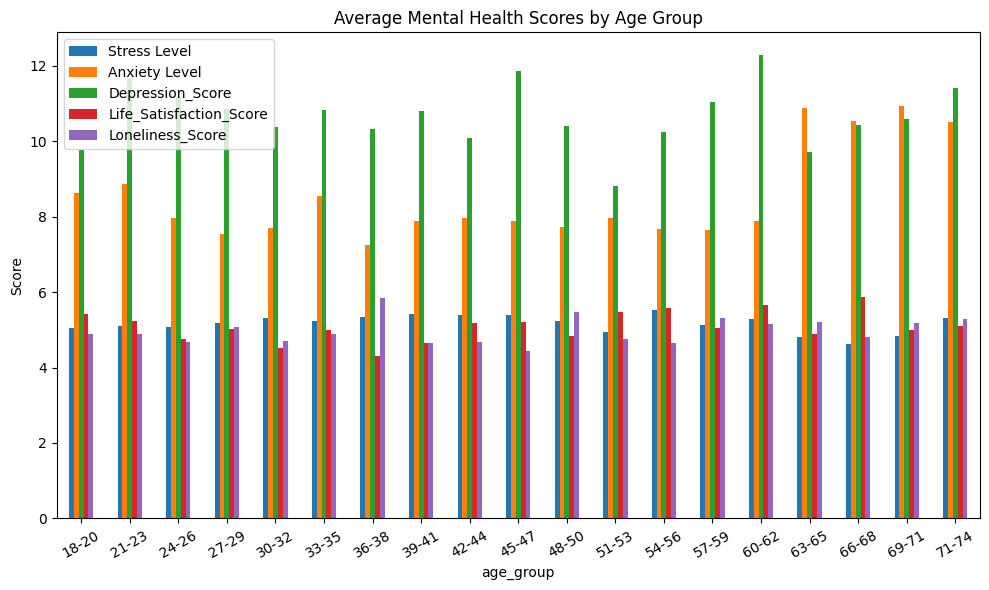

In [47]:
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Average Mental Health Scores by Age Group')
plt.ylabel('Score')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


According to this bar chart, one obvious observation is that people around 21-23, 45-47, 60-62 have the highest depression level. People above 63 have the highest anxiety level comparing to any other age groups. People in the middle age like from 35-55 tend to have the highest stress level

**Analysis of how Financial affects Anxiety Level**

In [48]:
merged_df.groupby('age_group')['Financial_Stress'].mean().sort_values(ascending=False)

<ipython-input-48-db83329eae0a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('age_group')['Financial_Stress'].mean().sort_values(ascending=False)


,Financial_Stress
age_group,
51-53,5.529412
48-50,5.507246
24-26,5.490909
54-56,5.242424
18-20,5.217391
27-29,5.142857
66-68,5.057143
30-32,5.056604
39-41,5.042857


This result shows that if we only consider about financial stress, it's not the main reason that influences anxiety level

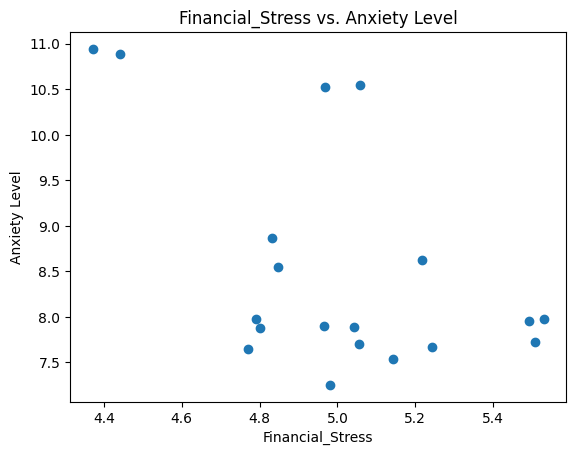

In [49]:
plt.scatter(merged_df['Financial_Stress'], merged_df['Anxiety Level'])
plt.xlabel('Financial_Stress')
plt.ylabel('Anxiety Level')
plt.title('Financial_Stress vs. Anxiety Level')
plt.show()

It even shows that people who have the lowest financial stress have the highest anxiety level

**Analysis of how sleep hour affects Anxiety Level**

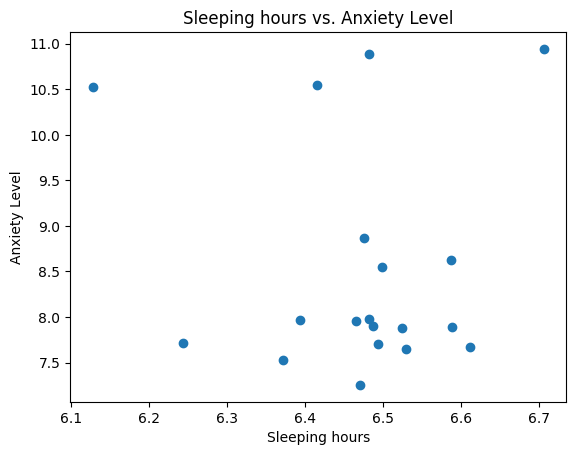

In [50]:
plt.scatter(merged_df['Sleeping hours'], merged_df['Anxiety Level'])
plt.xlabel('Sleeping hours')
plt.ylabel('Anxiety Level')
plt.title('Sleeping hours vs. Anxiety Level')
plt.show()

We can see that there is cluster that has a fair amonut of sleep hours, they have lower anxiety level. But there are also outliers

**Analysis of how pysical activity hour affects Anxiety Level**

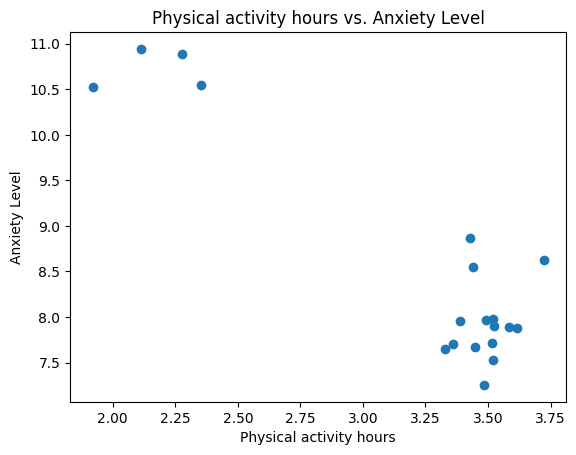

In [51]:
plt.scatter(merged_df['Physical activity hours'], merged_df['Anxiety Level'])
plt.xlabel('Physical activity hours')
plt.ylabel('Anxiety Level')
plt.title('Physical activity hours vs. Anxiety Level')
plt.show()

In [52]:
merged_df['Physical activity hours'].corr(merged_df['Anxiety Level'])

np.float64(-0.9148618474079238)

I found the highest correlated variables! As we can see, **higher physical activity hours** might cause **lower anxiety level**

Since physical activity helps with lowering anxiety, I wanna see how this effect stress level

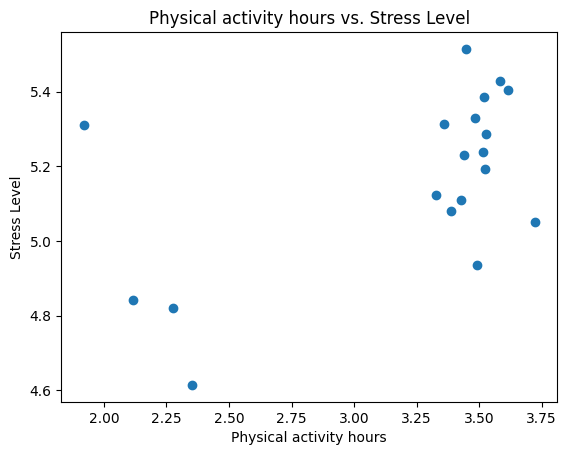

In [53]:
plt.scatter(merged_df['Physical activity hours'], merged_df['Stress Level'])
plt.xlabel('Physical activity hours')
plt.ylabel('Stress Level')
plt.title('Physical activity hours vs. Stress Level')
plt.show()

In [54]:
merged_df['Physical activity hours'].corr(merged_df['Stress Level'])

np.float64(0.5414911971502102)

This is a middle level positive correlation which means when the physical activity hour is higher, stress level tends to be higher

From those results above, my theory is when people feel stressful they might choose to do exersice to help with it, when they have physical activity hours, their anxiety gets released.

## **Plausible Models**

**1. Predicting Anxiety Level Based on Lifestyle**

This model will predict how sleep hour and physical activity hour effect anxiety level

**Dependent variables**: Anxiety Level

**Independent variables**: Sleeping hours, Physical activity hours

According to my EDA, there is certain correlation between physical activity hour, sleeping hour and anxiety level, especially the correlation between Physical activity hours and anxiety level is positively strong

**Methodology:** We can use train-test split and linear regression. We can split the dataset to training and test dataset, and use linear regression method to train the model and then make a prediction

**2. Predicting Anxiety Level Based on Other Stress Level**

This model will use classification model to predict how stress level, financial stress, work stress, depression level, loneliness level impact anxiety level

**Dependent variables:** Anxiety level

**Independent variables:** stress level, financial stress, work stress, depression level, loneliness level

**Methodology:** First we can set anxiety level into different categories (low, medium, high), set features and target, and then set training set and test set. After that, we can use KNN to train the model, and then we can predict the category of anxiety level. We can also calculate the precision and recall of this model


## **Milestone 3**

This section will build prediction models

**1. Predicting Anxiety Level Based on Lifestyle**

Using linearRegression

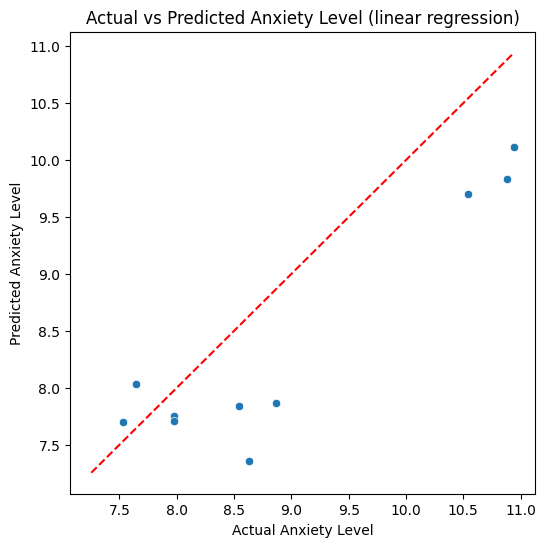

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler

features=merged_df[['Sleeping hours','Physical activity hours',]]
target=merged_df['Anxiety Level']

# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=42)

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# build model
model=LinearRegression()

model.fit(X_train,y_train)

# prediction
y_pred=model.predict(X_test)

# visualization
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Anxiety Level')
plt.ylabel('Predicted Anxiety Level')
plt.title('Actual vs Predicted Anxiety Level (linear regression)')
plt.plot([target.min(), target.max()], [target.min(), target.max()], color='red', linestyle='--')
plt.show()

This plot shows the actual and predicted anxiety level. The red line represents perfect prediction. I used linear regression because it's a very straightforward way to tell the prediction and the relationship between actual anxiety level and predicted anxiety level. This prediction almost follows the assumption

**Evaluation metrics**

I use MSE here

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.5884868348021403


**2. Predicting Anxiety Level Based on Other Stress Level**

Using KNN Regression

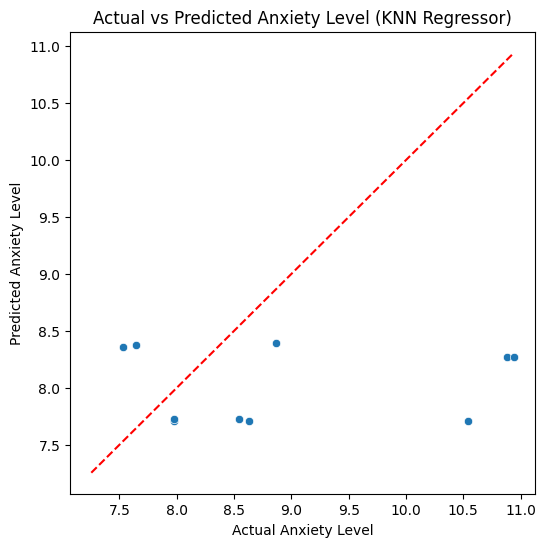

In [76]:
from sklearn.neighbors import KNeighborsRegressor


features = merged_df[['Stress Level', 'Financial_Stress', 'Work_Stress', 'Depression_Score', 'Loneliness_Score']]
target = merged_df['Anxiety Level']

# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)

# Predict
y_pred = knn_reg.predict(X_test_scaled)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([target.min(), target.max()], [target.min(), target.max()], color='red', linestyle='--')
plt.xlabel('Actual Anxiety Level')
plt.ylabel('Predicted Anxiety Level')
plt.title('Actual vs Predicted Anxiety Level (KNN Regressor)')
plt.show()

In this prediction model, I use KNN regression to predict anxiety level based on different stress level. In my previous sections, it showed that the relationship between anxiety level and other different stress level is not linear, so I want to use knn regression for my model

**Evaluation metrics**

In [80]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):", mse)
print(f"Mean Absolute Error (MAE):", mae)
print(f"R² Score:", r2)

Mean Squared Error (MSE): 0.5884868348021403
Mean Absolute Error (MAE): 0.6728415832418015
R² Score: 0.6354612892680649
